<a href="https://github.com/hernansalinas/autogrades/tree/main/Evaluaciones/Evaluacion01_2023_I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Parcial 01: Metodos computacionales para fisicos 
### Fecha 3/30/23

La entrega del examen es a través del github en la página del curso, en el directorio asociado a cada uno. 



Referencias: 

- Dataset tomado y modificado de : https://www.kaggle.com/sudalairajkumar/daily-temperature-of-major-cities

- http://www.sc.ehu.es/sbweb/fisica3/fluidos/stokes_1/stokes_1.html
- Lindemuth J. The effect of air resistance on falling balls. Am. J. Phys. 39, July 1971, pp. 757-759


## 1. (50%). Movimiento de una esfera de radio r en un fluido.

 Una esfera de radio $R$ que asciende o desciende por un fluido puede ser modelada a través de un modelo de partícula, sometida a tres fuerzas: el peso, el empuje y la fuerza rozamiento. Las  ecuaciones de posición (x) y velocidad (v) para un sistema de refencia úbicado en la base del fluido, pueden ser escritas como:

\begin{equation}
x = \frac{G}{\alpha²} \left( 1+\frac{\alpha v_0}{G} \right)(1-e^{-\alpha t}) - \frac{G}{\alpha}t
\end{equation}

\begin{equation}
v= \left ( v_0 +\frac{G}{\alpha} \right )e^{-\alpha t} - \frac{G}{\alpha}
\end{equation}



donde $G=\left( 1-\frac{\rho_f}{\rho} \right)g$, con $\rho_f$, $\rho$ la densidad del fluido y la esfera respectivamente y $g=9.8$ la aceleración de la gravedad y $\alpha$  una constante que depende del radio de la esfera, la viscosidad y la densidad.
$\alpha=\frac{9\eta}{2R^2\rho}$.

Suponga que una esferita de radio $R=2\times10^{-5}m$ es lanzada verticalmente hacia arriba en el agua, con una rapidez de $v_0=0.01$m/s.
Tomando la densidad del agua en  $\rho_f =1000 kg/m^3$,  la densidad de la esfera en $\rho=2670 kg/m^3$ y la viscosidad en $\eta=0.001 kg/ms$.  Determine: 

1. El tiempo total en que la esfera asciende  y desciende. 

2. Determine la rapidez final, con la que llega nuevamente de donde fue lanzada. 



Para ello construya un programa en python que:
- Permita calcular la posición como función del tiempo
- Permita calcular la rapidez como función del tiempo
- Cálcule  el tiempo total de subida y bajada empleando el método de la secante.

In [176]:
import numpy as np
import matplotlib.pyplot as plt


In [177]:
R = 2e-5
v0 = 0.01
rho_f = 1000
rho = 2670
mu  = 0.001
g= 9.8

In [178]:
G = (1-(rho_f / rho)) * g

alpha = 9 * mu /(2 * R**2 * rho) 

\begin{equation}
x = \frac{G}{\alpha^2} \left( 1+\frac{\alpha v_0}{G} \right)(1-e^{-\alpha t}) - \frac{G}{\alpha}t
\end{equation}

\begin{equation}
v= \left ( v_0 +\frac{G}{\alpha} \right )e^{-\alpha t} - \frac{G}{\alpha}
\end{equation}

In [179]:
#para calcular el tiempo en el que la esfera asciende, consideramos cuando la posición se vuelve a hace cero 
#partimos de la suposicion de que el punto del que se lanza es en la posicion cero

def vel(t):
  return (v0 + (G/alpha)) * np.exp(-alpha * t) - (G / alpha)

def x(t):
  return (G/alpha**2) * (1+ (alpha * v0 / G)) * (1- np.exp(-alpha * t)) - (G / alpha) *t

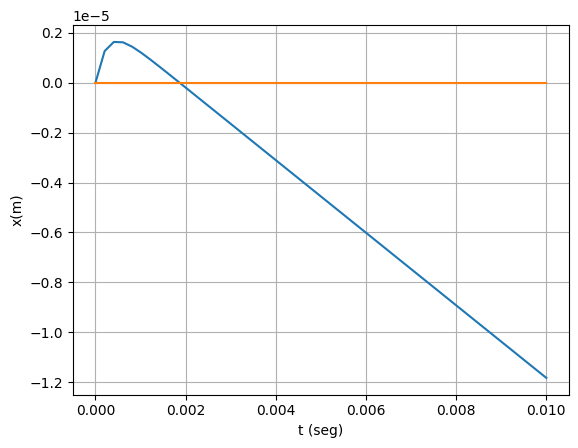

In [180]:
t = np.linspace (0,0.01)
x_ = x(t)
ceros = np.zeros(50)

plt.plot(t,x_)
plt.grid()
plt.plot(t, ceros)
plt.xlabel('t (seg)')
plt.ylabel('x(m)');

In [181]:
#empleamos ahora el método de la secante para er el tiempo en el cual la esfera vuelve a bajar del punto en el cual se lanzó

from scipy import optimize

raiz  = optimize.root_scalar(x, x0 =0.002, x1= 0.003).root

print(f'el tiempo que le toma a la esfera subir y volver a bajar es {raiz:.4f} segundos')

el tiempo que le toma a la esfera subir y volver a bajar es 0.0019 segundos


Text(0, 0.5, 'x(m)')

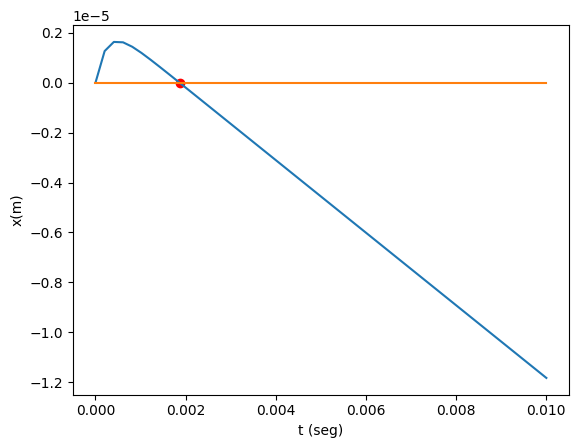

In [182]:
#lo graficamos

t = np.linspace (0,0.01)
x_ = x(t)
ceros = np.zeros(50)

plt.plot(raiz, x(raiz), 'ro')
plt.plot(t,x_)
plt.plot(t, ceros)
plt.xlabel('t (seg)')
plt.ylabel('x(m)')

In [183]:
#para ver la rapidez con la cual llega luego de ser lanzada, usamos el tiempo que obtuvimos en el numeral anterior y lo ingresamos a la función de rapidez

rapidez = vel(raiz)

print(f'la rapidez con la que llega la esfera al punto del cual fue lanzada es de {abs(rapidez)} m/s')          #como nos piden la rapidez, consideramos el valor absoluto de la velocidad

la rapidez con la que llega la esfera al punto del cual fue lanzada es de 0.0014503838278103792 m/s



## 2. (50%). Interpolación
Para los siguientes datos de temperatura media como función del tiempo de los últimos años de  Bogotá y Barcelona ([Temperature_Bogota_Barcelona](https://raw.githubusercontent.com/hernansalinas/autogrades/main/Evaluaciones/dataset/Temperature_Bogota_Barcelona.csv)). Aplique el método de  hermite y spline cúbicos. Para ello realice lo siguiente:

1. Leer el dataset desde la url, con el comando pd.read_csv.
2. Adicionar una nueva columna AvgTempCelcius con la temperatura en grados celcius. $ C=(F-32)/1.8$
3. Realizar un gráfico de AvgTempCelcius como función del año para la ciudad de Bogotá.
4. Realizar un gráfico de AvgTempCelcius como función del año para la ciudad de Barcelona.
4. Aplique el  metodos de interpolación de hermite para Bogotá y el metodo de interpolación de splines cubicos para Barcelona. 


Ayuda :

| Comando | Descripción |
| --- | --- |
| pd.read_csv() | Lee un archivo CSV y lo convierte en un DataFrame de Pandas |
| pd.read_excel() | Lee un archivo de Excel y lo convierte en un DataFrame de Pandas |
| pd.read_json() | Lee un archivo JSON y lo convierte en un DataFrame de Pandas |
| df.head() | Muestra las primeras filas del DataFrame |
| df.tail() | Muestra las últimas filas del DataFrame |
| df.info() | Muestra información sobre el DataFrame |
| df.describe() | Muestra estadísticas descriptivas del DataFrame |
| df.dropna() | Elimina filas con valores faltantes |
| df.drop_duplicates() | Elimina filas duplicadas |
| df.groupby() | Agrupa el DataFrame por una o más columnas |
| df.sort_values() | Ordena el DataFrame por una o más columnas |
| df.to_csv() | Guarda el DataFrame como un archivo CSV |
| df.loc[condicion] | Crea una máscara booleana para seleccionar filas que cumplan con ciertas condiciones |
| df[df["columna"]== x] | Crea una máscara booleana y a la aplica al dataframe en caso de el valor de la columna coincida con la variable |


In [184]:
import pandas as pd

1. Leer el dataset desde la url, con el comando pd.read_csv.


In [185]:
url = 'https://raw.githubusercontent.com/hernansalinas/autogrades/main/Evaluaciones/dataset/Temperature_Bogota_Barcelona.csv'

In [186]:
df = pd.read_csv(url)
df

,Unnamed: 0,Year,City,Month,Day,AvgTemperature
0,0,1995,Barcelona,6.526027,15.720548,62.019178
1,1,1995,Bogota,6.526027,15.720548,54.963014
2,2,1996,Barcelona,6.513661,15.756831,61.125956
3,3,1996,Bogota,6.513661,15.756831,55.083333
4,4,1997,Barcelona,6.526027,15.720548,62.612329
5,5,1997,Bogota,6.526027,15.720548,56.231507
6,6,1998,Barcelona,6.526027,15.720548,60.273973
7,7,1998,Bogota,6.526027,15.720548,49.642466
8,8,1999,Barcelona,6.526027,15.720548,61.204658
9,9,1999,Bogota,6.526027,15.720548,52.231781


2. Adicionar una nueva columna AvgTempCelcius con la temperatura en grados celcius. $ C=(F-32)/1.8$


In [187]:
#AvgTemperature --> voy a trabajar sobre esta columna

#creo una función que me permita convertir de grados F a gracos C

def cel(F):
  return (F-32) / 1.8

In [188]:
df['AvgTempCelcius'] = df['AvgTemperature'].apply(cel)

In [189]:
df

,Unnamed: 0,Year,City,Month,Day,AvgTemperature,AvgTempCelcius
0,0,1995,Barcelona,6.526027,15.720548,62.019178,16.677321
1,1,1995,Bogota,6.526027,15.720548,54.963014,12.757230
2,2,1996,Barcelona,6.513661,15.756831,61.125956,16.181087
3,3,1996,Bogota,6.513661,15.756831,55.083333,12.824074
4,4,1997,Barcelona,6.526027,15.720548,62.612329,17.006849
5,5,1997,Bogota,6.526027,15.720548,56.231507,13.461948
6,6,1998,Barcelona,6.526027,15.720548,60.273973,15.707763
7,7,1998,Bogota,6.526027,15.720548,49.642466,9.801370
8,8,1999,Barcelona,6.526027,15.720548,61.204658,16.224810
9,9,1999,Bogota,6.526027,15.720548,52.231781,11.239878


3. Realizar un gráfico de AvgTempCelcius como función del año para la ciudad de Bogotá.


In [190]:
#vamos a filtrar los valores correspondientes a la ciudad de bogotá, por medio de una máscara

mask = df['City'] == 'Bogota'
mask


0     False
1      True
2     False
3      True
4     False
5      True
6     False
7      True
8     False
9      True
10    False
11     True
12    False
13     True
14    False
15     True
16    False
17     True
18    False
19     True
20    False
21     True
22    False
23     True
24    False
25     True
26    False
27     True
28    False
29     True
30    False
31     True
32    False
33     True
34    False
35     True
36    False
37     True
38    False
39     True
40    False
41     True
42    False
43     True
44    False
45     True
46    False
47     True
48    False
49     True
50    False
51     True
Name: City, dtype: bool

In [191]:
#aplico la máscara al DataFrame original

bog = df[mask]
bog


,Unnamed: 0,Year,City,Month,Day,AvgTemperature,AvgTempCelcius
1,1,1995,Bogota,6.526027,15.720548,54.963014,12.757230
3,3,1996,Bogota,6.513661,15.756831,55.083333,12.824074
5,5,1997,Bogota,6.526027,15.720548,56.231507,13.461948
7,7,1998,Bogota,6.526027,15.720548,49.642466,9.801370
9,9,1999,Bogota,6.526027,15.720548,52.231781,11.239878
11,11,2000,Bogota,6.513661,15.756831,54.918579,12.732544
13,13,2001,Bogota,6.526027,15.720548,55.416164,13.008980
15,15,2002,Bogota,6.526027,15.720548,54.686849,12.603805
17,17,2003,Bogota,6.526027,15.720548,54.973425,12.763014
19,19,2004,Bogota,6.513661,15.756831,55.598087,13.110049


In [192]:
bog_mod = bog.drop(columns=['Unnamed: 0', 'City', 'Day', 'AvgTemperature', 'Month'])

In [193]:
bog_mod

,Year,AvgTempCelcius
1,1995,12.757230
3,1996,12.824074
5,1997,13.461948
7,1998,9.801370
9,1999,11.239878
11,2000,12.732544
13,2001,13.008980
15,2002,12.603805
17,2003,12.763014
19,2004,13.110049


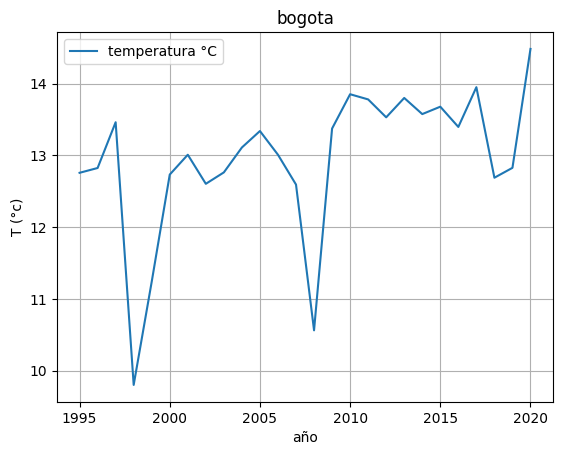

In [194]:
#Realizar un gráfico de AvgTempCelcius como función del año para la ciudad de Bogotá.

plt.plot(bog_mod.Year, bog_mod.AvgTempCelcius, label='temperatura °C')
plt.grid()
plt.xlabel('año')
plt.ylabel('T (°c)')
plt.legend()
plt.title('bogota');


4. Realizar un gráfico de AvgTempCelcius como función del año para la ciudad de Barcelona.



In [195]:
#hago lo mismo que hice anteriormente, pero ahora para la cuidad de Barcelona

mask = df['City'] == 'Barcelona'

bar= df[mask]
bar

,Unnamed: 0,Year,City,Month,Day,AvgTemperature,AvgTempCelcius
0,0,1995,Barcelona,6.526027,15.720548,62.019178,16.677321
2,2,1996,Barcelona,6.513661,15.756831,61.125956,16.181087
4,4,1997,Barcelona,6.526027,15.720548,62.612329,17.006849
6,6,1998,Barcelona,6.526027,15.720548,60.273973,15.707763
8,8,1999,Barcelona,6.526027,15.720548,61.204658,16.224810
10,10,2000,Barcelona,6.513661,15.756831,60.069399,15.594111
12,12,2001,Barcelona,6.526027,15.720548,59.279452,15.155251
14,14,2002,Barcelona,6.526027,15.720548,58.044110,14.468950
16,16,2003,Barcelona,6.526027,15.720548,63.139452,17.299696
18,18,2004,Barcelona,6.513661,15.756831,62.875137,17.152854


In [196]:
bar_mod = bar.drop(columns=['Unnamed: 0', 'City', 'Day', 'AvgTemperature', 'Month'])
bar_mod

,Year,AvgTempCelcius
0,1995,16.677321
2,1996,16.181087
4,1997,17.006849
6,1998,15.707763
8,1999,16.224810
10,2000,15.594111
12,2001,15.155251
14,2002,14.468950
16,2003,17.299696
18,2004,17.152854


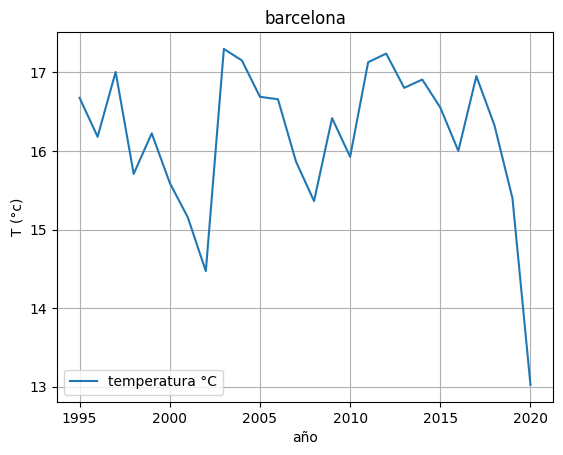

In [197]:
plt.plot(bar_mod.Year, bar_mod.AvgTempCelcius, label='temperatura °C')
plt.grid()
plt.xlabel('año')
plt.ylabel('T (°c)')
plt.legend()
plt.title('barcelona');

5. Aplique el  metodos de interpolación de hermite para Bogotá y el metodo de interpolación de splines cubicos para Barcelona. 

In [198]:
#comenzamos con el método de interpolacion de Hermite para bogotá

from scipy import interpolate


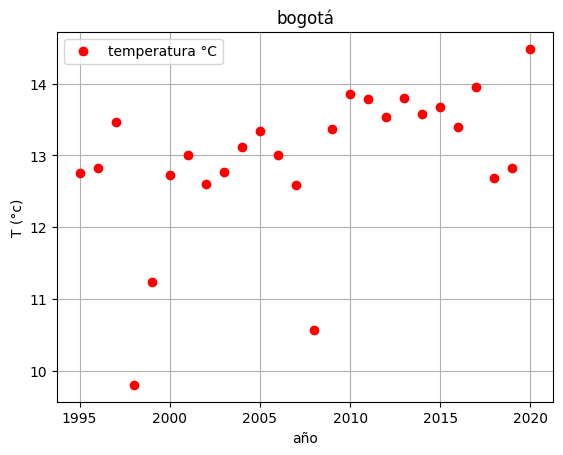

In [199]:
plt.plot(bog_mod.Year, bog_mod.AvgTempCelcius, 'ro',  label='temperatura °C')
plt.grid()
plt.xlabel('año')
plt.ylabel('T (°c)')
plt.legend()
plt.title('bogotá');

In [200]:
dydx = np.diff(bog_mod.AvgTempCelcius)
dydx, len(dydx), len(bog_mod.AvgTempCelcius)

(array([ 0.06684424,  0.63787418, -3.66057839,  1.43850837,  1.49266578,
         0.27643619, -0.40517503,  0.15920852,  0.34703487,  0.22922083,
        -0.3304414 , -0.41567732, -2.0312199 ,  2.81204182,  0.47808219,
        -0.07229833, -0.24939824,  0.26979398, -0.22480974,  0.10301212,
        -0.28202793,  0.55390166, -1.26149163,  0.13774733,  1.65693223]),
 25,
 26)

In [201]:
pol = interpolate.CubicHermiteSpline(bog_mod.Year[1:], bog_mod.AvgTempCelcius[1:], dydx)           #evitamos el primer punto, para que no haya problemas con lo de la diferenciación numérica

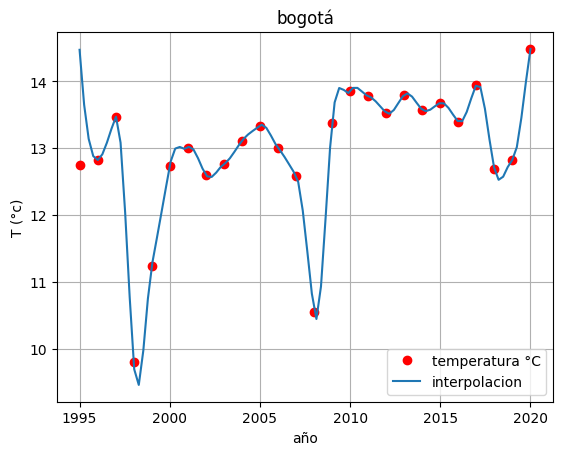

In [202]:
plt.plot(bog_mod.Year, bog_mod.AvgTempCelcius, 'ro',  label='temperatura °C')
x = np.linspace(min(bog_mod.Year), max(bog_mod.Year), 100)
plt.plot(x, pol(x), label='interpolacion')
plt.grid()
plt.xlabel('año')
plt.ylabel('T (°c)')
plt.legend()
plt.title('bogotá');

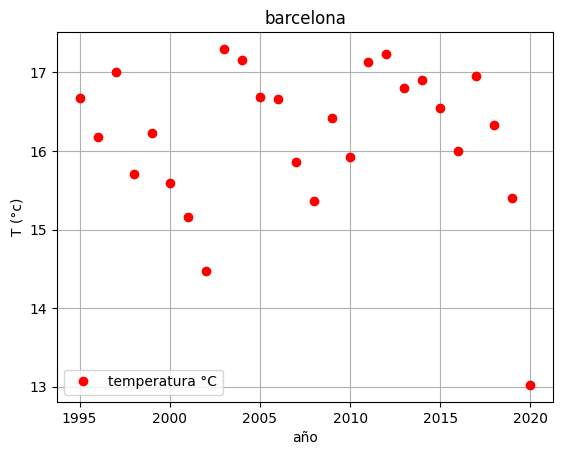

In [203]:
#veamos ahora con el método de splines cúbicos para barcelona

plt.plot(bar_mod.Year, bar_mod.AvgTempCelcius, 'ro', label='temperatura °C')
plt.grid()
plt.xlabel('año')
plt.ylabel('T (°c)')
plt.legend()
plt.title('barcelona');

In [204]:
poly = interpolate.CubicSpline(bar_mod.Year, bar_mod.AvgTempCelcius)

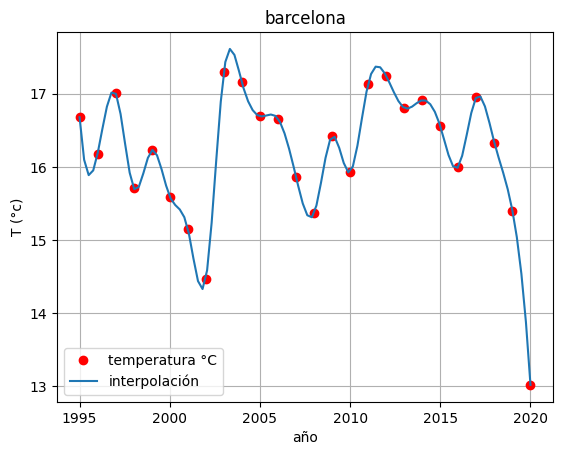

In [205]:
plt.plot(bar_mod.Year, bar_mod.AvgTempCelcius, 'ro', label='temperatura °C')
x= np.linspace(min(bar_mod.Year), max(bar_mod.Year), 100)
plt.plot(x, poly(x), label= 'interpolación')
plt.grid()
plt.xlabel('año')
plt.ylabel('T (°c)')
plt.legend()
plt.title('barcelona');